# Q3. Implement a kernel support vector machine with RBF kernel to classify the data in the dataset. Plot the data, the SVM decision boundary and highlight the support-vectors.

## Setting up libraries and data
- Data is tab delimited
- First column = feature x1
- Second column = feature x2
- Third column = Class label 

In [3]:
# Library imports
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# Load data via numpy library
disc=np.loadtxt("./Classification_Data/Data_Disc.txt", delimiter="\t")
disc

array([[ 2.93427168, -0.12004724,  1.        ],
       [ 1.11468716,  1.92931243, -1.        ],
       [-0.37374939,  2.65246588, -1.        ],
       [ 3.28384126,  0.58391587,  1.        ],
       [-0.95598974,  1.90541639, -1.        ],
       [ 0.7267248 ,  2.20243087, -1.        ],
       [ 0.02294493,  2.87547962, -1.        ],
       [-0.08198785,  2.54657186, -1.        ],
       [ 1.82568338, -1.05125951,  1.        ],
       [ 1.08959584,  0.74561764, -1.        ],
       [-0.31161302,  0.59445567,  1.        ],
       [ 2.69974098, -0.45223661,  1.        ],
       [ 0.48847751, -0.13337508,  1.        ],
       [ 0.13885303,  2.83583604, -1.        ],
       [ 0.52473005,  0.35843584,  1.        ],
       [ 1.31018349,  0.86438667, -1.        ],
       [ 0.59392611, -0.41257128,  1.        ],
       [-0.1046708 ,  2.22386183, -1.        ],
       [ 1.73032144,  1.14304155, -1.        ],
       [-1.39393603,  1.24721819, -1.        ],
       [ 2.12812001, -0.8244151 ,  1.   

In [3]:
# Extracting data individually into variables, x1, x2 and labels
xf = disc[:,:2] # Grabs both x1 and x2 into an array of arrays containing 2 vals
labels = disc[:,2]
xf # Testing extraction was successful

array([[ 2.93427168, -0.12004724],
       [ 1.11468716,  1.92931243],
       [-0.37374939,  2.65246588],
       [ 3.28384126,  0.58391587],
       [-0.95598974,  1.90541639],
       [ 0.7267248 ,  2.20243087],
       [ 0.02294493,  2.87547962],
       [-0.08198785,  2.54657186],
       [ 1.82568338, -1.05125951],
       [ 1.08959584,  0.74561764],
       [-0.31161302,  0.59445567],
       [ 2.69974098, -0.45223661],
       [ 0.48847751, -0.13337508],
       [ 0.13885303,  2.83583604],
       [ 0.52473005,  0.35843584],
       [ 1.31018349,  0.86438667],
       [ 0.59392611, -0.41257128],
       [-0.1046708 ,  2.22386183],
       [ 1.73032144,  1.14304155],
       [-1.39393603,  1.24721819],
       [ 2.12812001, -0.8244151 ],
       [ 1.26371092, -0.91028461],
       [ 2.59388068, -0.30176279],
       [-1.60203245,  0.86803899],
       [ 1.53859742, -1.47902991],
       [ 2.96960196,  0.18840861],
       [ 1.37781452,  0.30298105],
       [ 3.12235326,  1.05054958],
       [-0.40134411,

In [4]:
labels

array([ 1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,
        1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
       -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,  1

## Create meshgrid for displaying decision boundary

In [5]:
## Create mesh to plot - i.e. grab the lowest and highest values in all features
step = 0.1 # Step size for display purposes
x_min = min([min(xf[:,0]), min(xf[:,1])])-0.5
x_max = max([max(xf[:,0]), max(xf[:,1])])+0.5
print(x_min, x_max)

# Create mesh with given step-size via numpy
x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, step), np.arange(x_min, x_max, step))
print(x_mesh.shape, y_mesh.shape)
# print(min(x_mesh), max(x_mesh), min(y_mesh), max(y_mesh))

-2.42697982012365 3.78384126094834
(63, 63) (63, 63)


## Fit the SVM model based on RBF kernel (Radial Basis Function). More info on the kernel at https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html

### First model without search for optimal gamma and C values

In [6]:
'''
Create the necessary kernel support vector machine model with RBF kernel to deal with nonlinear
data by transforming into a higher dimension and making it linearly separable
- The C is the regularization parameter where the smaller it is the softer the margin for SVM.
- The gamma parameter indicates how much effect individual data points have over boundary.
    The larger the gamma the fewer datapoints will influence the decision boundary. It causes
    decision boundary to become non-linear and tends to cause overfitting. On the opposite,
    Smaller gamma allows for more datapoints to influence boundary and makes it more generic.
'''

# Values selected based on individual testing of parameters
kernel_model = svm.SVC(kernel='rbf', gamma=0.1, C=2.0) 
kernel_model.fit(xf, labels)

# Accuracy of data label prediction to check what gamma and C values to choose
acc = kernel_model.score(xf, labels)
"Gamma: ", 0.1, "C: ", 2.0, "Accuracy: ", acc

('Gamma: ', 0.1, 'C: ', 2.0, 'Accuracy: ', 0.9468085106382979)

# Fit model with additional function GridSearchCV which searches for optimal gamma and C parameters

In [8]:
'''
Create the necessary kernel support vector machine model with RBF kernel to deal with nonlinear
data by transforming into a higher dimension and making it linearly separable
- The C is the regularization parameter where the smaller it is the softer the margin for SVM.
- The gamma parameter indicates how much effect individual data points have over boundary.
    The larger the gamma the fewer datapoints will influence the decision boundary. It causes
    decision boundary to become non-linear and tends to cause overfitting. On the opposite,
    Smaller gamma allows for more datapoints to influence boundary and makes it more generic.
'''
params = {'gamma':[0.1,0.2,0.3,0.4,0.5], 'C':[1,2,4,5,6,10]}
# kernel_model = svm.SVC(kernel='rbf', gamma=0.1, C=2.0) # Old straight forward model build
ksvm = svm.SVC(kernel='rbf')
# Obtain the best gamma and c parameters
kernel_model2 = GridSearchCV(ksvm, params, cv=5) # Performs k-fold cross validation by default
# Fit model on data
kernel_model2.fit(xf, labels)
# Print out the best parameters gamma and C
print('Best gamma: ', kernel_model2.best_params_['gamma'], '\nBest C: ', kernel_model2.best_params_['C'])

# Accuracy of data label prediction to check what gamma and C values to choose
# acc = kernel_model.cv_results_
acc2 = kernel_model2.score(xf, labels)
"Accuracy: ", acc2

Best gamma:  0.5 
Best C:  5


('Accuracy: ', 1.0)

## Predict values based on two versions of the GDA

In [10]:
'''
Generate targets from a trained regression model by using the predict() sklearn function.
It will predict labels for the provided new data based on the trained model.
- Use the ravel function to create a continuous flattened array, ie: 
    [[1,2,3],[4,5,6]] => [1,2,3,4,5,6]
- Use the np.c_[] numpy function to create an array of arrays containing the x_mesh 
    and y_mesh vectors
'''
# Initial with no parameter adjustment
pred = kernel_model.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()])
# reshape output predicted based on x_mesh shape
print(pred.shape)
pred = pred.reshape(x_mesh.shape)
print(pred.shape)
pred

(3969,)
(63, 63)


array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.]])

In [12]:
# Second model including adjustment of parameters C and Gamma
pred2 = kernel_model2.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()])
# reshape output predicted based on x_mesh shape
print(pred.shape)
pred2 = pred2.reshape(x_mesh.shape)
print(pred2.shape)
pred2

(63, 63)
(63, 63)


array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.]])

## Compare number of support vectors per model

In [14]:
# Confirming length of support vectors for model without adjustment of parameters
print(len(kernel_model.support_vectors_))

# Confirming length of support vectors for model with adjusted parameters
len(kernel_model2.best_estimator_.support_vectors_)

43


15

## Plot data, the SVM decision boundary, and highlight the support-vectors for both model versions

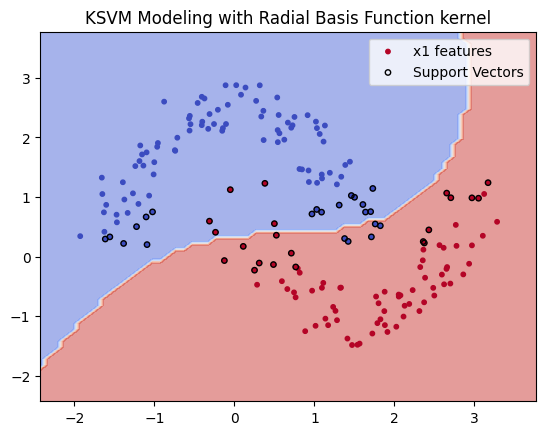

In [15]:
# Draw filled contour lines in matplotlib to denote the boundaries
plt.contourf(x_mesh, y_mesh, pred, cmap=plt.cm.coolwarm, alpha=0.5)
# Draw x1 and x2 features' data points in graph
plt.scatter(xf[:,0], xf[:,1], s=10, c=labels, cmap=plt.cm.coolwarm, label='x1 features')
# Assign title to graph
plt.title('KSVM Modeling with Radial Basis Function kernel')
# Display support vectors for both sets of features
plt.scatter(
    kernel_model.support_vectors_[:,0], 
    kernel_model.support_vectors_[:,1],
    facecolors='none',
    edgecolors='k',
    s=15,
    label='Support Vectors'
)
plt.legend()
plt.show()

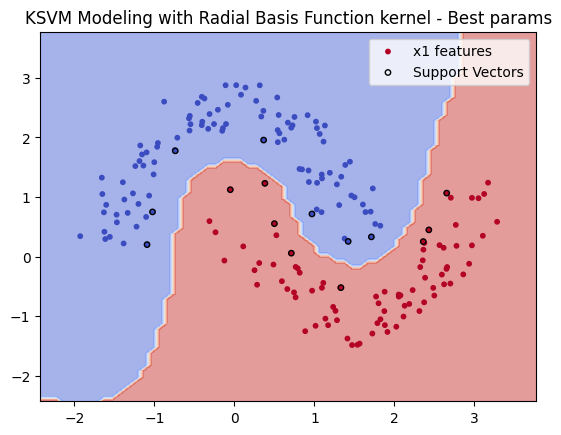

In [17]:
# Draw filled contour lines in matplotlib to denote the boundaries
plt.contourf(x_mesh, y_mesh, pred2, cmap=plt.cm.coolwarm, alpha=0.5)
# Draw x1 and x2 features' data points in graph
plt.scatter(xf[:,0], xf[:,1], s=10, c=labels, cmap=plt.cm.coolwarm, label='x1 features')
# Assign title to graph
plt.title('KSVM Modeling with Radial Basis Function kernel - Best params')
# Display support vectors for both sets of features
plt.scatter(
    kernel_model2.best_estimator_.support_vectors_[:,0], 
    kernel_model2.best_estimator_.support_vectors_[:,1],
    facecolors='none',
    edgecolors='k',
    s=15,
    label='Support Vectors'
)
plt.legend()
plt.show()

Please note, the code above was developed through the help of the following websites:
- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- https://www.geeksforgeeks.org/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/#
- https://vitalflux.com/svm-rbf-kernel-parameters-code-sample/

# Q4.Part 1: Implement a Gaussian Discriminant Function to classify the data, i.e., assume the conditionals p(x|y=1) and p(x|y=-1) are Gaussian and estimate the mean and the covariance matrices under two settings. A). Consider a common covariance matrix for the two conditionals. B). Estimate unique covariance matrices for each category.

Plot data and decision boundaries in each case and analyze results. Please note, no external libraries for Naïve Bayes and Gaussian Discriminant functions

## Set up data

In [214]:
# Numpy library has already been called - load data
gen = np.loadtxt("./Classification_Data/Data_Gen.txt", delimiter="\t")
gen.shape, gen

((400, 3),
 array([[ 2.83729672,  1.39476478,  1.        ],
        [ 2.5869362 ,  3.18648185,  1.        ],
        [ 2.19676128,  0.75528675,  1.        ],
        ...,
        [-0.65926925,  1.17090517, -1.        ],
        [-0.63657709,  0.05170763, -1.        ],
        [ 3.28350212,  1.13096836,  1.        ]]))

In [215]:
xgf = gen[:,:2]
glabels = gen[:,2]
xgf

array([[ 2.83729672e+00,  1.39476478e+00],
       [ 2.58693620e+00,  3.18648185e+00],
       [ 2.19676128e+00,  7.55286754e-01],
       [ 1.69908799e+00,  2.34961612e+00],
       [-1.11818832e+00, -1.06113974e+00],
       [ 2.67397729e+00,  3.24738227e+00],
       [ 3.70861601e+00,  1.76654079e+00],
       [ 1.49461448e+00,  1.62306756e+00],
       [ 1.42286036e+00,  2.36123759e+00],
       [ 1.43285863e+00,  8.08767444e-01],
       [ 3.37100795e+00,  2.69177435e+00],
       [ 2.08769552e+00,  1.59267214e+00],
       [ 1.76760715e-01,  8.13812953e-02],
       [ 2.22217693e+00,  1.53103286e+00],
       [-7.18932027e-01, -1.77277215e-01],
       [ 2.69305154e+00, -6.79683708e-01],
       [ 4.04763568e-01,  9.31481318e-01],
       [-1.01869095e+00,  9.33703620e-01],
       [ 1.57502402e+00,  1.45648899e-02],
       [ 1.75207982e+00,  3.16747170e-01],
       [-4.81675212e-01,  5.43110187e-01],
       [ 4.32992392e+00,  2.38630882e+00],
       [ 4.41319236e-01, -6.02821217e-03],
       [ 1.

## Split the data based on the categories/labels because it helps us identify each gaussian

In [216]:
g1 = gen[glabels == 1] # All input rows where category is 1
g2 = gen[glabels == -1] # All input rows where category is -1

## Perform Mean and Covariance calculation based on A or B scenarios

A covariance is a measure of how two random variables change together. It can be positive, negative, or zero, based on if they tend to increase or decrease together or are independent of each other. 

The formula for calculating the covariance of X and Y is: 

**cov(X, Y) = E[(X - E[X])(Y - E[Y])]**

where E[X] and E[Y] are the expected values or means of X and Y, and E[.] is the expectation operator. This formula can be simplified by using the sample means and dividing by the number of observations, n: 

**cov(X, Y) = (1/n) * sum((X - mean(X)) * (Y - mean(Y)))**

Therefore, a covariance matrix is a special type of matrix that contains the covariances between all the features or variables in a dataset. It is a symmetric and square matrix -> **same number of rows and columns, and elements are equal across the diagonal.**

The formula for calculating the covariance matrix C is: 

**C = (1/n) * (A - mean(A)).T * (A - mean(A))**

where A is the n x p matrix of the original data, mean(A) is the n x p matrix of the sample means of each feature, .T is the transpose operator that flips the rows and columns of a matrix, and * is the matrix multiplication operator that combines two matrices according to their dimensions.

"Alternatively, you can use the np.cov function which takes the data array as an input and returns the covariance matrix as an output."

(From: https://www.linkedin.com/advice/0/how-can-you-calculate-covariance-matrix-machine-learning)
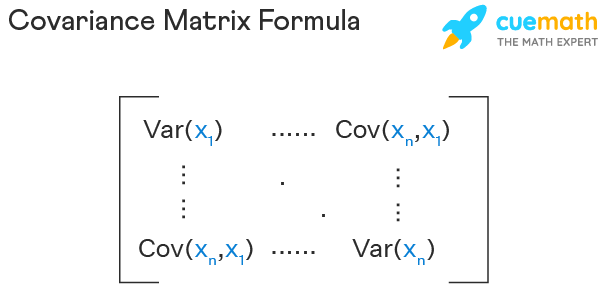

In [217]:
# Grabs the two feature columns and calculates a mean for each feature
mean_g1 = np.mean(g1[:,:2], axis=0) # mean for category +1
mean_g2 = np.mean(g2[:,:2], axis=0) # mean for category -1
mean_g1, mean_g2 # Returns a np.array with 2 values

(array([2.97574513, 2.07322965]), array([0.9566768 , 1.02510616]))

### A. Common covariance matrix for the two conditionals p(x|y=1) and p(x|y=-1)

In [218]:
# Build the common covariance matrix - it should be a 2 by 2 matrix because its based on the features number
# covariance formula = Xbar.T * xbar/number of samples
x_mu1 = g1[:,:2] - mean_g1
x_mu2 = g2[:,:2] - mean_g2
print(x_mu2.shape)
x_mus =np.concatenate((x_mu1, x_mu2), axis=0)
print(x_mus.shape)
common_cov = ((x_mus.T @ x_mus))/len(xgf)
common_cov.shape, common_cov

(200, 2)
(400, 2)


((2, 2),
 array([[1.07327118, 0.25114263],
        [0.25114263, 1.48780635]]))

### B. Unique covariance matrix for each conditional p(x|y=1) and p(x|y=-1)

In [219]:
cov1 = np.cov(g1[:,:2].T) # Uses only category 1 rows
cov2 = np.cov(g2[:,:2].T) # Uses only category -1 rows
cov1, cov2

(array([[ 1.17986857, -0.07490016],
        [-0.07490016,  2.01242037]]),
 array([[0.97746043, 0.57970946],
        [0.57970946, 0.97814515]]))

## Create meshgrid for prediction

In [220]:
# Create meshgrid to depict the decision boundary
# Set step size
step = 0.1
# Get minimum and maximum values from all features
x_min2 = min([min(gen[:,0]), min(gen[:,1])])-0.5
x_max2 = max([max(gen[:,0]), max(gen[:,1])])+0.5
print(x_min2, x_max2)
# Create meshgrid
x2_mesh, y2_mesh = np.meshgrid(np.arange(x_min2, x_max2, step), np.arange(x_min2, x_max2, step))
print(x2_mesh.shape, y2_mesh.shape)

-2.10797913966204 6.83894532385521
(90, 90) (90, 90)


## Calculate the priors for each category in the model

    - p(y=1) = labels = 1/ total number of labels
    - p(y=-1) = labels = -1 / total number of labels

In [221]:
# Calculate the priors for each category
prior1 = len(gen[gen[:,2] == 1])/len(gen)
prior2 = len(gen[gen[:,2] == -1])/len(gen)
prior1, prior2

(0.5, 0.5)

## Implement Gaussian Discriminant function classifier for a specified common or unique covariance
- "Gaussian Discriminant Analysis is a Generative Learning Algorithm and in order to capture the distribution of each class, it tries to fit a Gaussian Distribution to every class of the data separately." (From: https://www.geeksforgeeks.org/gaussian-discriminant-analysis/#)


- The GDA formula is:
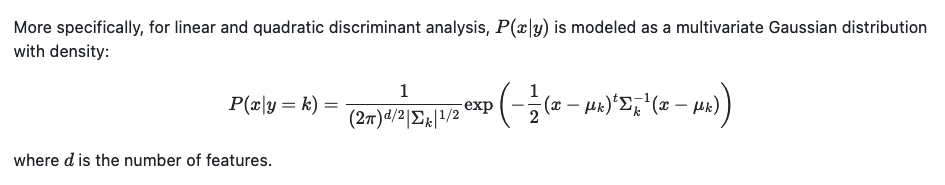


- And each category is calculated by:

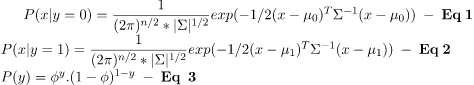


- Notes from sklearn - *'Using LDA and QDA requires computing the log-posterior which depends on the class priors , the class means , and the covariance matrices.'* from https://scikit-learn.org/stable/modules/lda_qda.html. Therefore, the final function to label data will be of the form: 

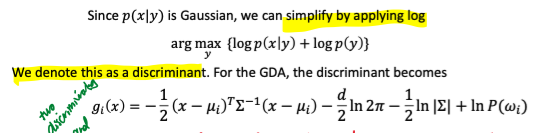


In [222]:
'''
Parameters: 
    - features x1 and x2 in a np.array column
    - np.array containing 2 mu/mean values for each of the two gaussians
    - covariance matrix
'''
def GDA_discriminant_predict(features:np.array, mu:np.array, prior:float, covariance_m:np.array) -> np.array:
    # Calculate the determinant of the covariance matrix
    cov_det = np.linalg.det(covariance_m)
    # Calculate the inverse of the covariance matrix
    cov_inv = np.linalg.pinv(covariance_m)
    # Get the substraction of all x - mu/mean
    x_mu = features-mu
    # Use the np.einsum to calculate ([x1,x2] - [mu1,mu2]).T*sigma-1*([x1,x2]-[mu1,mu2])
    x_mut_inv_x_mu = np.einsum('...i,ij,...j->...', x_mu, cov_inv, x_mu)
    # Perform the discriminant equation
    e = -((1/2)*x_mut_inv_x_mu)-((len(features)/2)*np.log(2*np.pi))-((1/2)*np.log(cov_det)) + (np.log(prior))
    # Return discriminant value
    return e


## (Item A) Predict and display the data with the decision boundary for common covariance

In [223]:
# Apply GDA predict function
d1 = GDA_discriminant_predict(np.c_[x2_mesh.ravel(), y2_mesh.ravel()], mean_g1, prior1, common_cov)
d2 = GDA_discriminant_predict(np.c_[x2_mesh.ravel(), y2_mesh.ravel()], mean_g2, prior2, common_cov)

In [224]:
# Join predictions as a numpy array for display of boundary purposes
ds = [d1,d2]
ds = np.array(ds)
print(ds)
# Obtain the index of the prediction with the highest value
# If index 0, then category 1 is selected, else if index 1, category -1 is selected
predGDA_c = np.argmax(ds.T, axis=1)
print(predGDA_c, predGDA_c.shape)
# Reformat the labels to resemble the original ones
# only run this one time because if done again it will flip the labels
predGDA_c[predGDA_c == 1] = -1
predGDA_c[predGDA_c == 0] = 1

[[-7459.48049095 -7459.06066116 -7458.65053183 ... -7455.64867561
  -7455.92705389 -7456.21513264]
 [-7450.72682493 -7450.48569176 -7450.25425905 ... -7466.02684499
  -7466.48391989 -7466.95069526]]
[1 1 1 ... 0 0 0] (8100,)


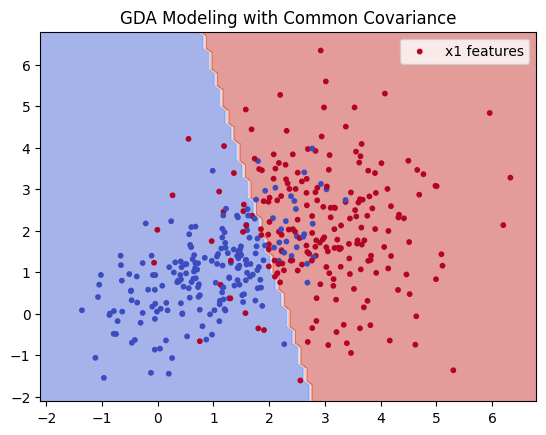

In [225]:
# Draw filled contour lines in matplotlib to denote the boundaries
plt.contourf(x2_mesh, y2_mesh, predGDA_c.reshape(x2_mesh.shape), cmap=plt.cm.coolwarm, alpha=0.5)
# Draw x1 and x2 features' data points in graph
plt.scatter(gen[:,0], gen[:,1], s=10, c=gen[:,2], cmap=plt.cm.coolwarm, label='x1 features')
# Assign title to graph
plt.title('GDA Modeling with Common Covariance')
plt.legend()
plt.show()

## (Item B) Predict and display the data with the decision boundary for unique covariances

In [226]:
# Apply GDA predict function with unique covariances
d1u = GDA_discriminant_predict(np.c_[x2_mesh.ravel(), y2_mesh.ravel()], mean_g1, prior1, cov1)
d2u = GDA_discriminant_predict(np.c_[x2_mesh.ravel(), y2_mesh.ravel()], mean_g2, prior2, cov2)

In [227]:
# Join predictions as a numpy array for display of boundary purposes
dsu = [d1u,d2u]
dsu = np.array(dsu)
# Obtain the index of the prediction with the highest value
# If index 0, then category 1 is selected, else if index 1, category -1 is selected
predGDA2 = np.argmax(dsu.T, axis=1)
print(predGDA2, predGDA2.shape)
# Reformat the labels to resemble the original ones - Run this cell only once
predGDA2[predGDA2 == 1] = -1
predGDA2[predGDA2 == 0] = 1

[1 1 1 ... 0 0 0] (8100,)


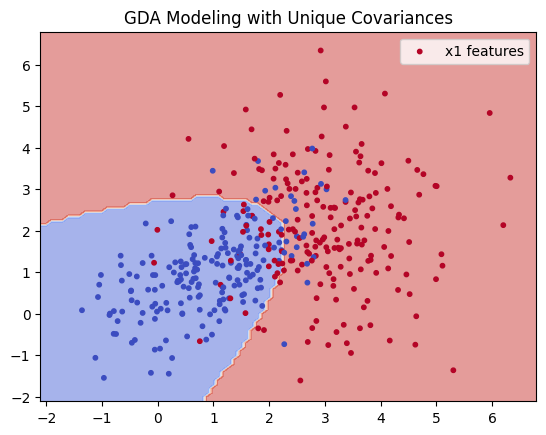

In [228]:
# Draw filled contour lines in matplotlib to denote the boundaries
plt.contourf(x2_mesh, y2_mesh, predGDA2.reshape(x2_mesh.shape), cmap=plt.cm.coolwarm, alpha=0.5)
# Draw x1 and x2 features' data points in graph
plt.scatter(gen[:,0], gen[:,1], s=10, c=gen[:,2], cmap=plt.cm.coolwarm, label='x1 features')
# Assign title to graph
plt.title('GDA Modeling with Unique Covariances')
plt.legend()
plt.show()

Resources for above code:

https://stackoverflow.com/questions/26089893/understanding-numpys-einsum

https://mathformachines.com/posts/discriminant-analysis/

# Q4.Part2: Implement a Gaussian Naive Bayes Classifier.

## Create a common variance independent of the category

In [229]:
# Since we already have the common covariance matrix, we can obtain the common variances from it
common_var1 = common_cov[0][0]
common_var2 = common_cov[1][1]
common_vars = [common_var1, common_var2]
common_vars = np.array(common_vars)
common_vars

array([1.07327118, 1.48780635])

## Estimate unique variances for each feature component per category.

Since unique covariances have been issued. We will use the variances inside the covariance matrices

In [230]:
uvar1 = [cov1[0][0], cov1[1][1]]
uvar2 = [cov2[0][0], cov2[1][1]]
uvar1 = np.array(uvar1)
uvar2 = np.array(uvar2)
uvar1, uvar2

(array([1.17986857, 2.01242037]), array([0.97746043, 0.97814515]))

## Create the Gaussian Naive Bayes Predictor function

The formula for the Gaussian NB is:

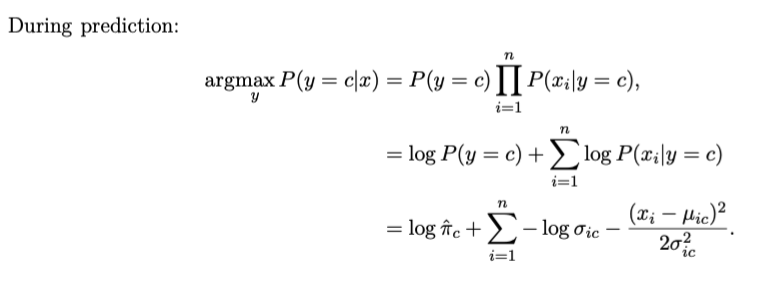

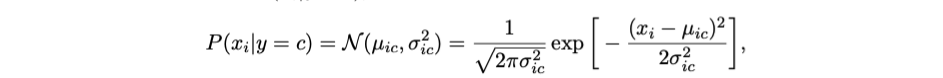


Priors have already been calculated for each category in part 1 and therefore, they will be used for part 2.

In [362]:
def GNB_features_prob_given_category(features, means, variances):
    # Substract the category mean from each of the features' x values
    x_mu = features-means
    # print("x_mu: ", x_mu)
    # Return the probability of each feature x given a category
    return (1/np.sqrt(2*np.pi*variances))*(np.exp(-(x_mu)**2/(2*variances)))

In [363]:
def GNB_predict(num_categories, features, means, variances, priors):
    probs = []
    for i in range(num_categories):
        a = GNB_features_prob_given_category(features, means[i], variances[i])
        # print(f"Feature probs c{i}: ", a)
        mul = a[:,0]
        for i in range(1, a.shape[1]):
            mul = mul * a[:,i]
            # print("mul: ", mul)
        c = priors[i]*mul
        # print("c: ", c)
        probs.append(c)
    
    probs = np.array(probs)
    # print(probs[0][0], probs[1][0]) # To confirm order was maintained after runing function with Transpose
    return probs.T

## (Item A) Apply the GNB predictor when considering a common variance

In [364]:
# Get individual probabilities
GNBprob_c = GNB_predict(
    np.unique(gen[:,2]).shape[0], 
    np.c_[x2_mesh.ravel(), y2_mesh.ravel()], 
    np.array([mean_g1, mean_g2]), 
    np.array([common_vars, common_vars]), 
    np.array([prior1, prior2])
)
GNBprob_c.shape, GNBprob_c

((8100, 2),
 array([[1.04396550e-09, 2.92571825e-05],
        [1.66868205e-09, 3.87453182e-05],
        [2.64249751e-09, 5.08346114e-05],
        ...,
        [8.00571222e-08, 3.31153768e-13],
        [5.68912837e-08, 1.94973121e-13],
        [4.00539209e-08, 1.13729553e-13]]))

## (Item B) Apply the GNB predictor when considering unique variances

In [365]:
# Get individual probabilities
GNBprob_u = GNB_predict(
    np.unique(gen[:,2]).shape[0], 
    np.c_[x2_mesh.ravel(), y2_mesh.ravel()], 
    np.array([mean_g1, mean_g2]), 
    np.array([uvar1, uvar2]), 
    np.array([prior1, prior2])
)
GNBprob_u.shape, GNBprob_u

((8100, 2),
 array([[1.17522518e-08, 4.41414102e-06],
        [1.80055345e-08, 6.00883232e-06],
        [2.73533219e-08, 8.09637986e-06],
        ...,
        [8.00767677e-07, 2.96802137e-16],
        [5.86888541e-07, 1.65905988e-16],
        [4.26504731e-07, 9.17939398e-17]]))

## Fix the label formattting for each probability outcome

In [366]:
# Get the category with the highest probability based on index inside numpy array
GNBprob_c_f = np.argmax(GNBprob_c, axis=1)
GNBprob_u_f = np.argmax(GNBprob_u, axis=1)
GNBprob_c_f.shape, GNBprob_c_f.T # Testing content is correct

((8100,), array([1, 1, 1, ..., 0, 0, 0]))

In [367]:
# Fix category to show index 0 is for category 1 and index 1 is for category -1
GNBprob_c_f[GNBprob_c_f == 1] = -1
GNBprob_c_f[GNBprob_c_f == 0] = 1
GNBprob_u_f[GNBprob_u_f == 1] = -1
GNBprob_u_f[GNBprob_u_f == 0] = 1
GNBprob_c_f

array([-1, -1, -1, ...,  1,  1,  1])

## Plot the data and the decision boundaries in each case.

### Decision boundary for GNB with common variance

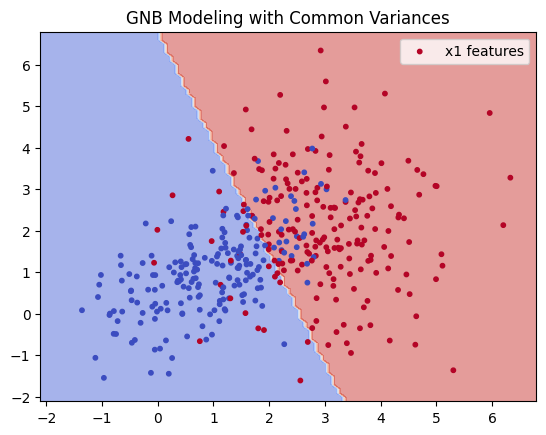

In [372]:
# Draw filled contour lines in matplotlib to denote the boundaries
plt.contourf(x2_mesh, y2_mesh, GNBprob_c_f.reshape(x2_mesh.shape), cmap=plt.cm.coolwarm, alpha=0.5)
# Draw x1 and x2 features' data points in graph
plt.scatter(gen[:,0], gen[:,1], s=10, c=gen[:,2], cmap=plt.cm.coolwarm, label='x1 features')
# Assign title to graph
plt.title('GNB Modeling with Common Variances')
plt.legend()
plt.show()

### Decision boundary for GNB with unique variance

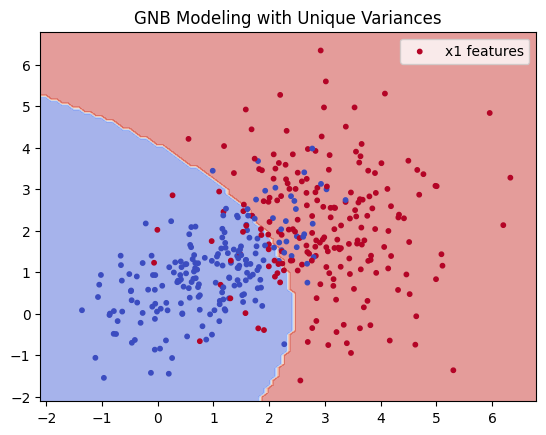

In [373]:
# Draw filled contour lines in matplotlib to denote the boundaries
plt.contourf(x2_mesh, y2_mesh, GNBprob_u_f.reshape(x2_mesh.shape), cmap=plt.cm.coolwarm, alpha=0.5)
# Draw x1 and x2 features' data points in graph
plt.scatter(gen[:,0], gen[:,1], s=10, c=gen[:,2], cmap=plt.cm.coolwarm, label='x1 features')
# Assign title to graph
plt.title('GNB Modeling with Unique Variances')
plt.legend()
plt.show()